# Introduction to Spatial Data Analysis

This notebook will introduce you to spatial data analysis using Python. There are several types of spatial data including Geotif, NetCDF, HDF5, GRIB. In this exercise, you will learn how to read, manipulate, plot and save NetCDF data. By the end of this exercise you should be able to:

1. Read NetCDF data using Xarray
2. Interrogate the data
3. Sub-set NetCDF data to a region and time of interest
4. Perform simple arithmetics on the data
5. Save the output as NetCDF data
6. Plot the results of the analysis

NetCDF (Network Common Data Form) is a set of software libraries and machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data (Ref: https://www.unidata.ucar.edu/software/netcdf/). It is also a community standard for sharing scientific data.

Data in netCDF format is:

* **Self-Describing:** A netCDF file includes information about the data it contains.
* **Portable:** A netCDF file can be accessed by computers with different ways of storing integers, characters, and floating-point numbers.
* **Scalable:** Small subsets of large datasets in various formats may be accessed efficiently through netCDF interfaces, even from remote servers.
* **Appendable:** Data may be appended to a properly structured netCDF file without copying the dataset or redefining its structure.
* **Sharable:** One writer and multiple readers may simultaneously access the same netCDF file.
* **Archivable:** Access to all earlier forms of netCDF data will be supported by current and future versions of the software.

There are several modules available for reading NetCDF data in Python and these include, *Netcdf4, Xarray, and Iris*. You can Explore the other packages in your own free time. Here we will make use of the **Xarray** module. Xarray (https://docs.xarray.dev/en/stable/index.html) makes working with labelled multi-dimensional arrays in Python simple, efficient, and fun! It depends on Numpy and Pandas modules.

To install xarray with its recommended dependencies using the conda command line tool:

* conda install -c conda-forge xarray dask netCDF4 bottleneck

You can also use pip to install xarray:

* python -m pip install xarray

In [2]:
## Let's load the required module after installation

import xarray as xr                 ## Import xarray module into the Python environment and shorten the name as xr

The next step is to define the path to our dataset. The data is located in in our local folders. You can define either an absolute or relative path to your data in order to read the data using xarray. 

In [3]:
## Let's define a variable path and assign 'https://drive.google.com/uc?export=download&id=' to it

path = '../../netcdf_data/'

Remember, in order to concatenante two strings you need to use the *'+'* sign. We will now use the *open_dataset()* function in the xarray module to read our NetCDF file that is saved in a Google Drive folder.

In [4]:
## Reading a netcdf file saved in a Google drive folder defined by the strings stored in the variables path and nc_file.
## The two strings are concatenated using '+' sign.

ds = xr.open_dataset(path + 'cru_ts3.21.2011.2019.tmn.dat.nc')      ## Reading a netcdf file saved in a Google drive folder.

In [5]:
## Let's assess the class of our dataset which has been read into ds.

print('The class of ds is: ', type(ds))

The class of ds is:  <class 'xarray.core.dataset.Dataset'>


We can interrogate our dataset further for us to fully understand the structure of data we are dealing with. Typing 'ds' in an empty cell should output something similar to the image below:

<img src="./ncdf_info2.png" width=900 height=400 />

In [24]:
##  Let us interrogate our data. You can uncomment the other lines to view the output. 

# ds                  ## Will show you more about the whole data
# ds.lon              ## Will show you more details about the longitude coordinate. Same can be done for the other coords (ds.lat, ds.time)
# ds.tmn              ## Shows more details about the data with variable name tmn.
# ds.stn              ## To get additional info about the 'stn' variable

In [ ]:
## Extracting the coordinate and variable values. You can uncomment the lines to view the output.

# ds.lon.values          ## Extracts the values of longitude coordinate
# ds.tmn.values          ## Extracts the numerical values of tmn
# ds.stn.values          ## Extracts the values of stn

In [30]:
## The attributes of each of the categories are stored as Dictionaries. Uncomment the lines to view the output.

# type(ds.tmn.attrs)    ## Check the data type
# ds.tmn.attrs          ## List the available attributes of the variable 'tmn'

In [31]:
## Let's extract the units of variable 'tmn'. Uncomment the lines to view the output.

# ds.tmn.attrs.['units']      ## Show the units of variable 'tmn'
# ds.tmn.attrs['long_name']   ## Show the long name of variable 'tmn'

## Sub-setting Xarray Dataset

We have seen that the NetCDF data covers global land areas from the Climate Research Unit (CRU). The variable of interest is near surface temperature minimum (tmn). We can sub-set the data to a region of interest, for us the region is the East Africa/ the Greater Horn of Africa region. It is also possible to select a point of interest. It is possible to use other sophisticated methods such as using a shapefile to sub-set the data. We are hower going to concentrate on simple method of defining the latitude and longitude bounding box of our region of interest.

Let's use the following coodinate of the GHA bounding box to sub-set our global data to our region:

* Latitude: -15.0 degreesN to 24.0 degreesN
* Longitude: 22.0 degreesE to 52.0 degreesE

In [6]:
## Subsettting the global data to GHA region

# ds_gha = ds.sel(lat=slice(-15.0, 24.0), lon=slice(22.0, 52.0))   ## Sub-set the global data to GHA region using bounding box
# ds_stn = ds.sel(lat=2.3, lon=35.9, method='nearest')             ## This will extract for a single point.

In [34]:
## Ucomment the line to interrogate the data.

# ds_gha           ## This will show that the dimensions have reduced to (60, 78, 108) from (720, 360, 108)

## Simple Spatial Summaries

The data is now sub-set for our region of interest. Next, we will perform some simple arithmetics on our spatial data to summarize the data for our region of interest. Sophisticated analysis can be done, however, we will only concentrate on the simple methods to demonstrate the concepts. We will concentrate on the following:

* Monthly climatology of GHA
* Seasonal climatology
* Seasonal Anomalies

### Monthly Climatology

The climatology is given by the sum of the data points divided by the number of points/observations. This is given by the equation below. We want to implement this for each month in a year. We will make use of xarray in built math functionalities for this task.

$$
\bar{X} = \frac{1}{N} \sum \limits_{i=1}^N X_{i}
$$

Monthly mean analysis requires us to group our data according to months. The number of groups will be 12 corresponding to the number of months in a year. The mean of each month can therefore be obtain after grouping the data. We will usw the **groupby()** function in xarray.

In [41]:
## Let's group our data according to months

ds_mon = ds_gha.groupby('time.month');ds_mon       ## Grouping the data by months

In [40]:
## We will find the mean of the grouped data

ds_clim = ds_mon.mean('time');ds_clim              ## Mothly climatology of tmin over our area of interes, GHA.

In [8]:
## Note the above two steps can be achieved using a single command. Uncomment to find out!

ds_clim2 = ds_gha.groupby('time.month').mean('time');ds_clim2  ## The above two steps using one line

### Seasonal Climatology

The formular for calculating seasonal climatology is similar to that of simple mean. The only difference is that it will be applied over a particular season of interest. There are two approaches to do this:

1. First group our dataset according to seasons ['DJF', 'JJA', 'MAM', 'SON'] as defined in xarray
2. Select the months of interest that define the particular season of interest from the data, then calculate the mean.

We will use the first approach. The second approach is left as an exercise.

In [10]:
## Group data according to predefined seasons in xarray

ds_seas = ds_gha.groupby('time.season');ds_seas      ## Group data according to seasons

In [9]:
## Calculate the climatology of the seasons

seas_clim = ds_seas['MAM'].mean('time');seas_clim    ## Calculate the climatology mean for MAM season

In [7]:
## To do this conviniently using one line of code

seas_clim2 = ds_gha.groupby('time.season')['MAM'].mean('time');seas_clim2   ## Convenient way of achieving the above using one line of code

In [11]:
## Let's view the data

seas_clim2.tmn.plot()

### Seasonal Mean Anomalies

The formula for calculating the mean seasonal anomaly is:

$$
\hat{X} = X_{i} - \bar{X}
$$

Where $\bar{X}$ and $X_{i}$ are the climatology and observation for the particular season of interest respectively. 

In [16]:
## Group data according to predefined seasons in xarray

ds_seas2 = ds_gha.groupby('time.season');ds_seas2      ## Group data according to seasons

DatasetGroupBy, grouped over 'season'
4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'.

In [17]:
## Calculate the climatology of the seasons

seas_clim2 = ds_seas2['MAM'].mean('time');seas_clim2    ## Calculate the climatology mean of MAM season

<xarray.Dataset>
Dimensions:  (lon: 60, lat: 78)
Coordinates:
  * lon      (lon) float32 22.25 22.75 23.25 23.75 ... 50.25 50.75 51.25 51.75
  * lat      (lat) float32 -14.75 -14.25 -13.75 -13.25 ... 22.75 23.25 23.75
Data variables:
    tmn      (lat, lon) float32 16.26 16.44 15.95 15.35 ... 22.63 22.62 22.69
    stn      (lat, lon) float64 0.1852 0.1852 0.1852 ... 0.8148 0.8148 0.8148

In [18]:
## Calculate the yearly anomaly

ds_anom = ds_seas2['MAM'] - seas_clim2

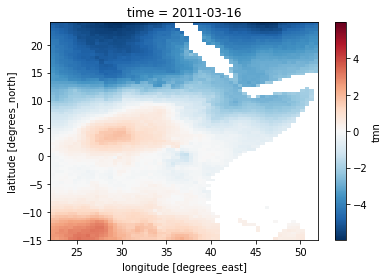

In [19]:
## Let's view the data

ds_anom.tmn[0,:,:].plot()

## Plotting the Results

We will be using the most popular plotting modules in Python called Matplotlib to plot or results. Most of the Matplotlib functionality is available in the pyplot submodule, in most cases this is imported and shortened as plt.

Matplotlib has two fundamental objects: *fig* and *axis*.

* Fig object defines the main container (canvas/plot area) for plotting. It can contain multiple plots inside it.
* Axis object defines an individual plot/graph and can contain one or more axes.

In [13]:
## Import the plotting module

import matplotlib.pyplot as plt

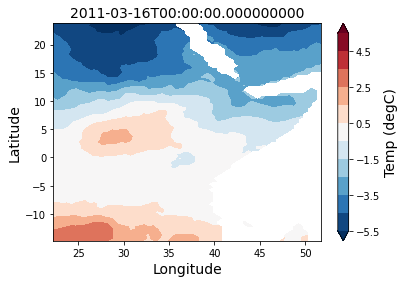

In [43]:
fig, ax = plt.subplots(1,1)                             ## define the fig object to contain one axis
plt.contourf(ds_anom.lon, ds_anom.lat, ds_anom.tmn[0,:,:], cmap='RdBu')  ## plotting filled contours
plt.title(ds_anom.time[0].values, fontsize=14)          ## Add plot title which is the first time step
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.colorbar().set_label('Temp (degC)', fontsize=14)    ## Add colorbar and label
# plt.show()

### Sophisticated plots

It is possible to further customize the plots to your needs. In this exercise we will learn how to add additional details to our plot. We will also add multiple plots, add country border in one figure and save the output.

In [10]:
## Let's load the necessary modules

import numpy as np
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [35]:
fig = plt.figure(figsize=(7, 5))
plt.clf()
# ax = plt.axes()

proj = ccrs.PlateCarree(central_longitude=0)
ax = plt.subplot(111, projection=proj)

# plt.contourf(ds_anom.lon, ds_anom.lat, ds_anom.tmn[0,:,:], levels=np.arange(-5.5, 6, 1), 
#                   cmap=plt.cm.RdBu.reversed(), extend = 'both')

#ax = plt.subplot(121, projection=proj)
ax.add_feature(cfeat.BORDERS,linestyle=':',linewidth=1.)
ax.add_feature(cfeat.LAKES,facecolor='none', edgecolor='black',linewidth=1)
ax.add_feature(cfeat.COASTLINE,linewidth=1.)

plt.show()

TypeError: draw_wrapper() got an unexpected keyword argument 'inframe'

<Figure size 504x360 with 1 Axes>

In [34]:
fig = plt.figure(figsize=(7, 5))
plt.clf()
#ax = plt.subplot(121)
proj = ccrs.PlateCarree(central_longitude=0)
ax = plt.subplot(121, projection=proj)
ax.add_feature(cfeat.BORDERS,linestyle=':',linewidth=1.)
ax.add_feature(cfeat.LAKES,facecolor='none', edgecolor='black',linewidth=1)
ax.add_feature(cfeat.COASTLINE,linewidth=1.)
plt.contourf(ds_anom.lon, ds_anom.lat, ds_anom.tmn[0,:,:], levels=np.arange(-5.5, 6, 1), 
                  cmap=plt.cm.RdBu.reversed(), extend = 'both')
# ax.set_extent([23, 51, 0, 15])
# ax.set_xticks(range(23, 51, 5), crs=ccrs.PlateCarree(central_longitude=0))
# ax.set_yticks(range(2, 15, 5), crs=ccrs.PlateCarree(central_longitude=0))
lakes_50m = cfeat.NaturalEarthFeature('physical', 'lakes', '50m',edgecolor='k',facecolor='none')
coastline_50m = cfeat.NaturalEarthFeature('physical', 'coastline', '50m',edgecolor='k',facecolor='none')
ax.add_feature(lakes_50m, edgecolor='black',facecolor='none',linewidth=0.75)
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
labelsx = ax.get_xticklabels()
labelsy = ax.get_yticklabels()
plt.setp(labelsx, fontsize=10)
plt.setp(labelsy, fontsize=10)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000219278859D8> (for post_execute):


TypeError: draw_wrapper() got an unexpected keyword argument 'inframe'

TypeError: draw_wrapper() got an unexpected keyword argument 'inframe'

<Figure size 504x360 with 1 Axes>

In [45]:
## Let's plot monthly data for Jan to April as a single figure. This will be a 2X2 multipanel plot

fig = plt.figure(figsize=(8, 9))
proj = ccrs.PlateCarree(central_longitude=0)
ax = plt.subplot(2, 2, 1, projection=proj)
# plt.subplots_adjust(left=0.12, bottom=0.18, right=0.97, top=0.95, wspace=0.1, hspace=0.01)

cs = plt.contourf(ds_anom.lon, ds_anom.lat, ds_anom.tmn[0,:,:], levels=np.arange(-5.5, 6, 1), 
                  cmap=plt.cm.RdBu.reversed(), extend = 'both')

ax.set_extent([21, 52, -6, 23.5])
ax.set_xticks(np.arange(21, 52, 10))
ax.set_yticks(np.arange(-5, 23, 5))
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
labelsx = ax.get_xticklabels()
labelsy = ax.get_yticklabels()
plt.setp(labelsx, fontsize=10)
plt.setp(labelsy, fontsize=10)
ax.label_outer()
ax.text(0.9, 0.90, '(a)', fontsize = 12, horizontalalignment='center',
        verticalalignment='center', rotation='horizontal', transform=ax.transAxes)

# #plt.title('SSP126-CDD', fontsize=10, fontweight="bold")
# plt.title('ENSmean CDD[days] \n SSP126[2021-2050]-Hist[1985-2014] for Horn of Africa', fontsize=8.5)

# ## Second colour bar

# #cbx = fig.add_axes([0.985, 0.195, 0.02, 0.35])   ## [left, bottom, width, height]
# cbx = fig.add_axes([0.55, 0.14, 0.43, 0.015])
# cb = plt.colorbar(cs2, cbx, orientation='horizontal', extend = 'both')
# #cb = plt.colorbar(cs2, shrink=0.9, pad = 0.05)
# #fig.colorbar(cs2, ax=ax[1:, :], location='right', shrink=0.6)
# tick_font_size = 8
# cb.ax.tick_params(labelsize=tick_font_size)
# cb.set_label('cwd', fontsize = 9, labelpad = -1)

# #cb.set_label('% Change in Rainfall', fontsize = 10, labelpad = -1)
# #cb.set_label('Change in CDD (days year$^{-1}$)', fontsize = 11, labelpad = -1)
# #cb.set_label('Change in ETR ($^\circ$C)', fontsize = 11, labelpad = -1)  #$^\circ$

# plt.savefig('../plots/future_changes_rainfall_extremes_igad2.png')
# #plt.close('all')

# plt.show()

### References and Additional Materials

1. Mapping and Data Visualization with Python Course by Ujaval Gandhi www.spatialthoughts.com
2. Plotting data on a map (Example Gallery) https://matplotlib.org/basemap/users/examples.html

In [24]:
import cartopy.feature as cfeat

In [ ]:
conda install -c conda-forge cartopy